<a href="https://colab.research.google.com/github/AdityaGhatty/Datascience/blob/main/AditGhatU4Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U3proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU3proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

# Unit 4 Project: Using Hierarchies to Account for Dependence Between Groups

**Task**:

Two parts:

1. Propose a data set that's compatible with a hierarchical model structure built with pymc, and that potentially has some dependence between subgroups within the data set. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a model using pymc within the colab environment, on a data set of your choice, with the following restrictions
- You must have at least one piror and at least one hyperprior.
- Your model must have at least one seperate prior for each subgroup of the data set, and a at least one shared hyperior for all the groups.
- Any student may use the following data set: [basketball2324](https://github.com/thedarredondo/data-science-fundamentals/blob/main/Data/basketball2324.csv). I recommend trying to model TRB (total rebounds) by player position (pos). Also, I recommend pandas query function to splice and clean the data.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough. There is an execption to this rule for unit 4: [NBA player data from the 2023-2024 season](https://github.com/thedarredondo/data-science-fundamentals/blob/main/Data/basketball2324.csv). Other seasons are allowed as well.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- All students are allowed to use this data set: [NBA player data from the 2023-2024 season](https://github.com/thedarredondo/data-science-fundamentals/blob/main/Data/basketball2324.csv). Why? This is could lead to similar analysis as the soccer data analysis--basically, I think this data set will work well with the models we ran in class. Let me know if you have questions about downloading and cleaning the data.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit4NotesAK *is* your example! You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- I didn't totally understand the chemical shift context--which means you don't have to totally understand the context of your data either! You should try to learn as you go, though.


### **CONTEXT**

In basketball, field goal percentage is a key indicator of a team's offensive efficiency. FG% measures the percentage of shots made relative to total attempted, and teams might vary in this depending on how they play. Teams vary in this depending on their style of play, team roster, and game strategy. Golden state warriors might have a high FG% due to their focus on shooting, while teams like the Memphis Grizzlies that rely on volume shooting might have a lower FG%.


The goal of this project is to understand and analyze the FG% of NBA teams during the season. By analysing FG%, we can gain insights into how consistently teams execute their offensive strategies and identify potential outliers, whether they excel or fall short. Understanding this distribution can help compare individual team performances and make decisions in game preparation, scouting, and even sports betting.

In [2]:
!pip install "preliz[full,notebook]"
import preliz as pz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.2/514.2 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0


In [3]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm

In [4]:
url_nba = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/basketball2324.csv'
bball = pd.read_csv(url_nba)
#dropping all TOT players (played for more teams, data can't be used for much)
bball = bball.query('Tm!="TOT"')
bball = bball.query('`FG%` != 0')
#resetting indexes after query removal
bball.reset_index(drop=True, inplace=True)
#turning Teams into categorical vairable
bball['Tm'] = bball['Tm'].astype('category')
bball


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
1,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
2,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
3,Grayson Allen,SG,28,PHO,75,74,2513,340,682,0.499,...,48,247,295,227,69,45,95,157,1014,allengr01
4,Jarrett Allen,C,25,CLE,77,77,2442,519,819,0.634,...,243,568,811,210,53,81,121,147,1271,allenja01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Christian Wood,PF,28,LAL,50,1,872,123,264,0.466,...,39,215,254,49,16,33,50,72,347,woodch01
482,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
483,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01
484,Cody Zeller,C,31,NOP,43,0,320,26,62,0.419,...,48,64,112,39,9,5,16,45,76,zelleco01


In [5]:
#Creating an array of NBA teams as int values
Tm_idx=bball.Tm.cat.codes.values
#an array of the strings representing position
Tm_codes=bball.Tm.cat.categories
bball_coords = {"Tm":Tm_codes}

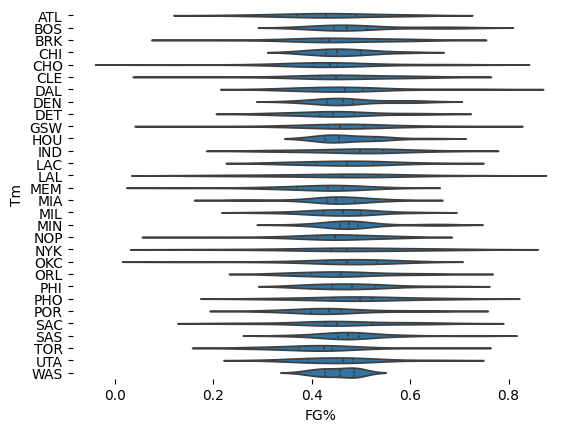

In [6]:
FG=bball[['Tm', 'FG%']]
sns.violinplot(FG, x='FG%', y='Tm', inner='quart')
sns.despine(top=True, right=True, bottom=True, left=True)

From this plot, I can see that the teams have FG%s of around 0.45 ish. I've serached this up on the internet as well just to make sure, since I'm not sure what a reasonable number is.

I'm not sure what to do with my likelihood. I know that:

1. My data from the plots has a mean of around 0.45, consistent with an internet search.

2. There seems to not be too heavy of a skew, but there may be a moderate skew higher because it's the NBA.I assume at least a couple players have high free throw percentages (Steph Curry at 91%). Another search shows that the lowest in the NBA is at 41%.

I'm going to start with a beta distribution with negligble skew and fix things later on if necessary.


I need an alpha and a beta for my beta distribution.

Both values have to be positive, so their priors should be non-negatives only. I'll use a Gamma distribution for these. Because the mean is 0.45 and not 0.5, Beta should be slightly larger than alpha.


<Axes: >

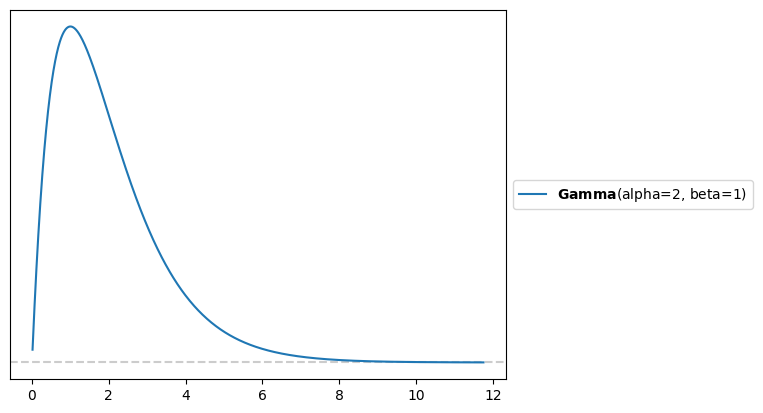

In [7]:
#hyperprior for a and b. represents how spread out values of a and b can be. skewed to the right because I don't want too big of a scale
pz.Gamma(alpha=2, beta=1).plot_pdf()

/usr/local/lib/python3.10/dist-packages/pymc/model/core.py:1278: ImputationWarning: Data in likelihood contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


Output()

Output()

Output()

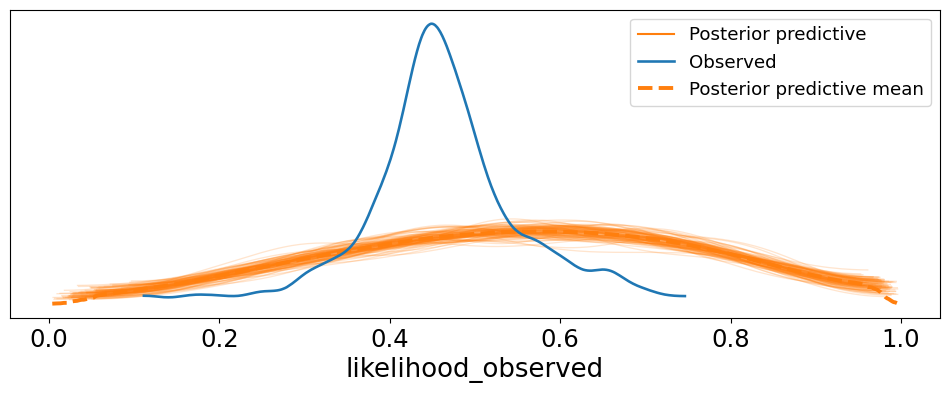

In [8]:
with pm.Model(coords = bball_coords) as model:
  scale = pm.Gamma("scale", alpha=20, beta=10)

  alpha = pm.Gamma("alpha", alpha=20, beta=scale, dims = "Tm")
  beta = pm.Gamma("beta", alpha=25, beta=scale+10, dims = "Tm") #beta>alpha so that the mean is slightly below 0.5
  likelihood = pm.Beta("likelihood", alpha = alpha[Tm_idx], beta=beta[Tm_idx], observed=bball['FG%'])
  #idata_bball = pm.sample()
  #model.debug()
  idata_bball = pm.sample()
pm.sample_posterior_predictive(idata_bball, model=model, extend_inferencedata = True)
ax = az.plot_ppc(idata_bball, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Looks like I'm WAY off. I'll need what looks to me like a normal distribution with a mean of 0.45, instead of a beta distribution. It could be something with the alpha and beta too, but I feel like a normal distribution would suit the graph better.

In [ ]:
with pm.Model(coords = bball_coords) as model:
  scale = pm.Gamma("scale", alpha=20, beta=10)

  mew = pm.Normal("mew", mu=0.45, sigma=0.1)
  sigma = pm.HalfNormal("sigma", sigma=scale) #beta>alpha so that the mean is slightly below 0.5
  likelihood = pm.Normal("likelihood", mu=mew, sigma=sigma, observed=bball['FG%'])
  #idata_bball = pm.sample()
  #model.debug()
  idata_bball1 = pm.sample()
pm.sample_posterior_predictive(idata_bball1, model=model, extend_inferencedata = True)
ax = az.plot_ppc(idata_bball1, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

/usr/local/lib/python3.10/dist-packages/pymc/model/core.py:1278: ImputationWarning: Data in likelihood contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


Output()

This looks nicer, but I'll need to play around with the standard deviation to get the right shape.

Sampling ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 / 0:00:00

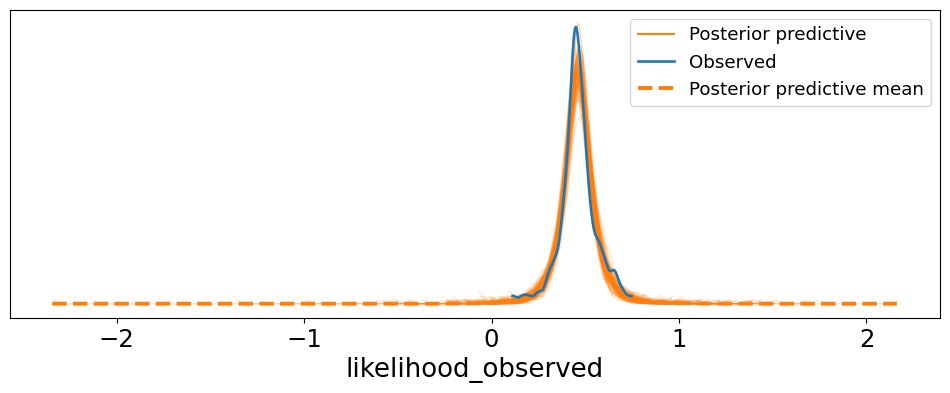

In [28]:
with pm.Model(coords = bball_coords) as model:
    mu_mew = pm.Normal("mu_mew", mu=0.45, sigma=0.1)  # Overall mean FG%
    sigma_mew = pm.HalfNormal("sigma_mew", sigma=0.05)  # Team-level variability
    mu_sigma = pm.HalfNormal("mu_sigma", sigma=0.1)  # Overall team-level spread
    sigma_sigma = pm.HalfNormal("sigma_sigma", sigma=0.05)  # Variability in spread
    #-------------------------------------------------------------------------------------------
    mew = pm.Normal("mew", mu=mu_mew, sigma=sigma_mew, dims="Tm")  # Team-specific FG%
    sigma = pm.HalfNormal("sigma", sigma=mu_sigma, dims="Tm")  # Team-specific standard deviation
    #-------------------------------------------------------------------------------------------
    likelihood = pm.StudentT(
    "likelihood",
    mu=mew[Tm_idx],  # Use team-specific means
    sigma=sigma[Tm_idx],  # Use team-specific standard deviations
    nu=4,  # Degrees of freedom for Student's T
    observed=bball["FG%"],
    )
    #-------------------------------------------------------------------------------------------
    idata_bball2 = pm.sample(target_accept= 0.95)
pm.sample_posterior_predictive(idata_bball2, model=model, extend_inferencedata=True)
ax = az.plot_ppc(
    idata_bball2, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"]
)


this looks good, but I'm not sure how to bound it between 0 and 1. Because every value outside this range is negligble, I'll ignore it for now. Not for a lack of trying though, I've attempted a couple things.

Now, I'll be running a non-heirarchical model on the same data. This is to see if theres a change once we make our values independent.

/usr/local/lib/python3.10/dist-packages/pymc/model/core.py:1278: ImputationWarning: Data in likelihood contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


Output()

Output()

Output()

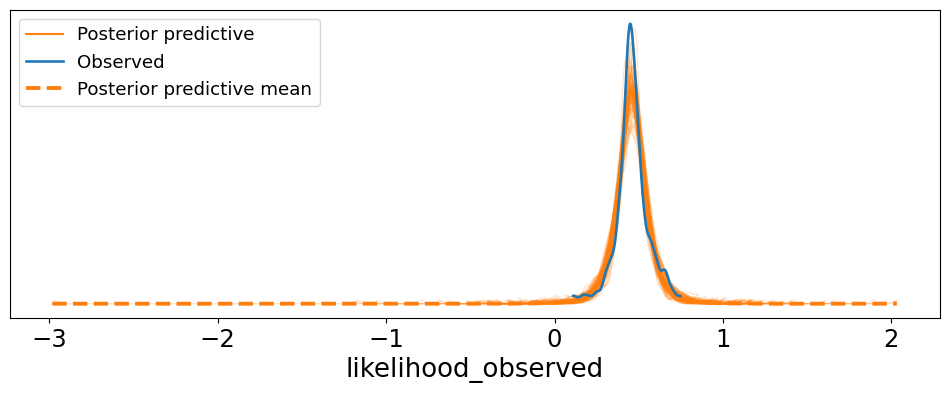

In [27]:
with pm.Model(coords = bball_coords) as model_nh:
    mew = pm.StudentT("mew", mu=0.45, sigma=0.1, nu=4, dims="Tm")

    # Define the standard deviation with a HalfNormal prior
    sigma = pm.HalfNormal("sigma", sigma=0.1, dims="Tm")

    # Define the likelihood with a Student-T distribution
    likelihood = pm.StudentT("likelihood", mu=mew[Tm_idx], sigma=sigma[Tm_idx], nu=4, observed=bball['FG%'])


    idata_bball3 = pm.sample(target_accept= 0.95)

# Generate posterior predictive samples
pm.sample_posterior_predictive(idata_bball3, model=model_nh, extend_inferencedata=True)

# Plot posterior predictive checks
ax = az.plot_ppc(idata_bball3, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

array([<Axes: >], dtype=object)

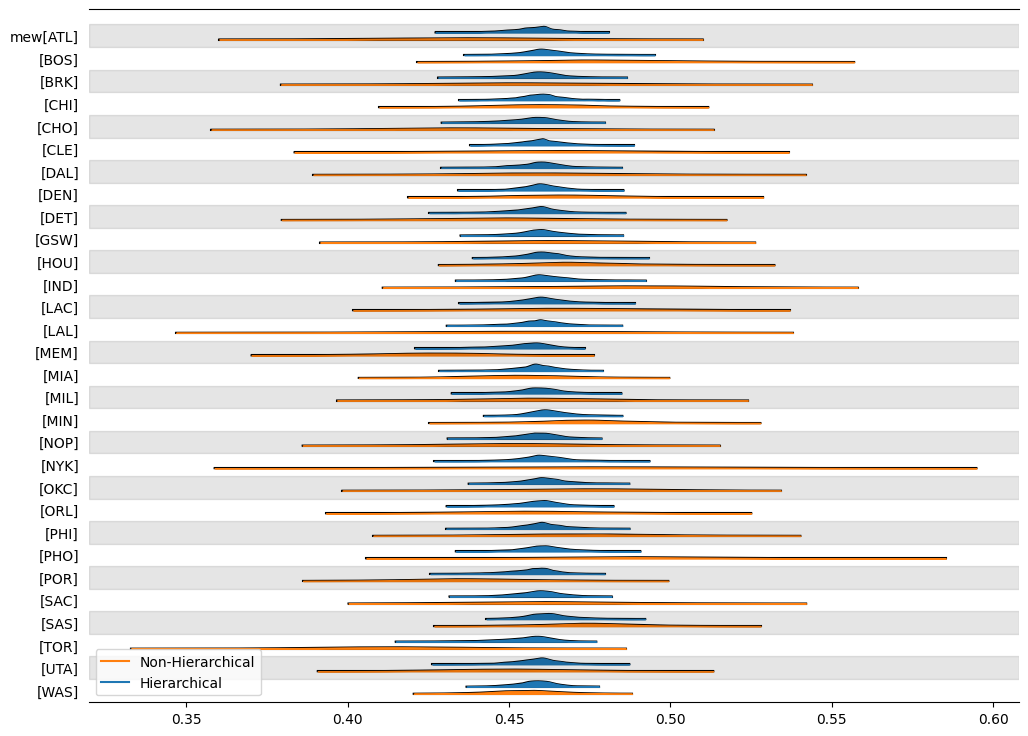

In [25]:
# Plot the middle 99.7% of each team's posterior distribution of the mean
az.plot_forest(
    [idata_bball2, idata_bball3],  # Pass both inference data objects
    kind="ridgeplot",  # Use ridgeplot for visualization
    var_names="mew",  # Variable to compare
    model_names=["Hierarchical", "Non-Hierarchical"],  # Names of the models
    combined=True,  # Combine the models in the plot
    figsize=(12, 9),  # Set the figure size
    hdi_prob=0.997  # Middle 99.7% of the posterior
)

The heirarchical distribution reduced the spread of the distribution for every team by a lot. The non-heirarchical ones have some major outliers on both extremes. The hierarchical model better accounts for shared information across teams, pulling the team-level estimates toward the overall mean and reducing the influence of extreme observations.

We can check the R-hat values and trace plots to see if we can dind anything else about the model's performance. If the R-hat values are close to 1 and the trace plots show well-mixed chains, we can have confidence in the accuracy of the hierarchical model.










/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


array([[<Axes: title={'center': 'likelihood'}>,
        <Axes: title={'center': 'likelihood'}>],
       [<Axes: title={'center': 'likelihood_unobserved'}>,
        <Axes: title={'center': 'likelihood_unobserved'}>],
       [<Axes: title={'center': 'mew'}>, <Axes: title={'center': 'mew'}>],
       [<Axes: title={'center': 'mu_mew'}>,
        <Axes: title={'center': 'mu_mew'}>],
       [<Axes: title={'center': 'mu_sigma'}>,
        <Axes: title={'center': 'mu_sigma'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>],
       [<Axes: title={'center': 'sigma_mew'}>,
        <Axes: title={'center': 'sigma_mew'}>],
       [<Axes: title={'center': 'sigma_sigma'}>,
        <Axes: title={'center': 'sigma_sigma'}>]], dtype=object)

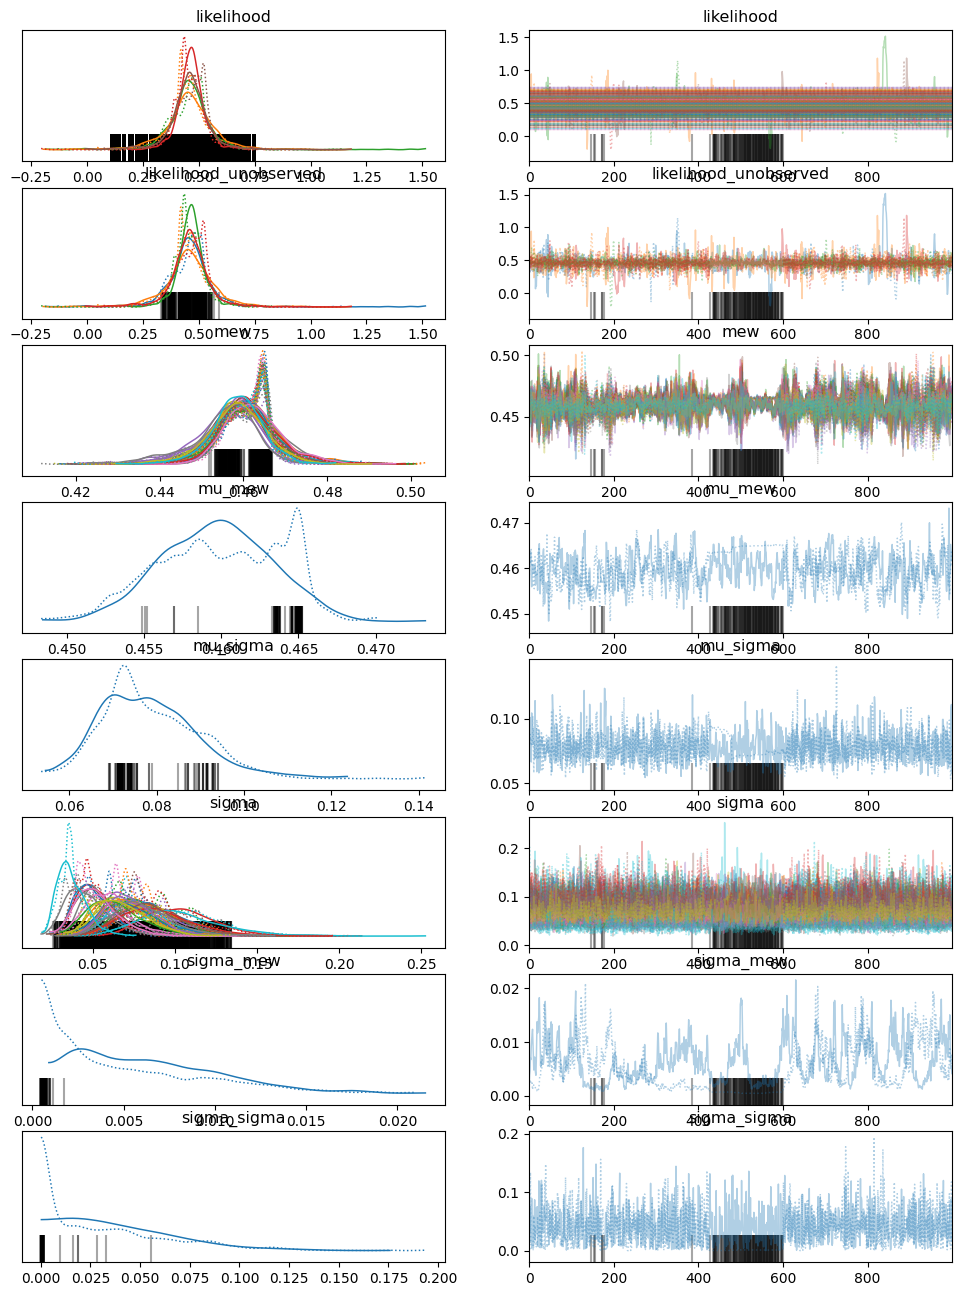

In [29]:
az.plot_trace(idata_bball2)

This is an interesting plot. I have no idea what the black things mean, so I'll ignore them.

In [31]:
az.rhat(idata_bball2)

/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


<xarray.Dataset> Size: 9kB
Dimensions:                      (likelihood_dim_0: 486,
                                  likelihood_unobserved_dim_0: 4, Tm: 30)
Coordinates:
  * likelihood_dim_0             (likelihood_dim_0) int64 4kB 0 1 2 ... 484 485
  * likelihood_unobserved_dim_0  (likelihood_unobserved_dim_0) int64 32B 0 1 2 3
  * Tm                           (Tm) <U3 360B 'ATL' 'BOS' 'BRK' ... 'UTA' 'WAS'
Data variables:
    likelihood                   (likelihood_dim_0) float64 4kB nan nan ... nan
    likelihood_unobserved        (likelihood_unobserved_dim_0) float64 32B 1....
    mew                          (Tm) float64 240B 1.016 1.009 ... 1.014 1.008
    mu_mew                       float64 8B 1.021
    mu_sigma                     float64 8B 1.007
    sigma                        (Tm) float64 240B 1.009 1.009 ... 1.006 1.002
    sigma_mew                    float64 8B 1.05
    sigma_sigma                  float64 8B 1.021

no values less than 1.1, so I should be good


Looking at the results, it’s clear that the hierarchical model does a much better job of capturing the true distribution of FG% across teams. The spread for each team is much tighter compared to the non-hierarchical model, which had some major outliers. This makes sense because the hierarchical model acknowledges that teams have more in common with each other, which is why the individual team estimates are more consistent and realistic.

The non-hierarchical model, on the other hand, produced some extreme outliers that really skewed the results. These outliers seem to show that the model didn’t account for the relationships between teams, which is why the distribution was wider and less reliable. The hierarchical approach, by modeling those dependencies, gives us a better fit for the data overall.

Overall, I think the hierarchical model gives us a much better picture of how FG% works across teams. It accounts for the fact that teams are connected in certain ways, and their players aren’t all just independent of each other. The non-hierarchical model just doesn’t capture that as well, and we end up with a bunch of outliers.






